# Исследование данных о продажах видеоигр

Описание прокета: Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Представлены данные вплоть до 2016 года.

Цель исследования: Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Общая информация

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
from scipy import stats as st

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/datasets/games.csv')

In [ ]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
data.info()
print('\nКоличество дубликатов:', data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Количество дубликатов: 0


In [ ]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Предобработка данных

In [ ]:
#Количество пустых значений и их доля в данных.
display(data.isna().sum(), round(data.isnull().mean() * 100, 2))

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
NA_sales            0.00
EU_sales            0.00
JP_sales            0.00
Other_sales         0.00
Critic_Score       51.32
User_Score         40.09
Rating             40.48
dtype: float64

In [ ]:
#Приводим название столбцов к нижнему регистру.
data.columns = data.columns.str.lower()

In [ ]:
#Удалим строки, где присутсвтуют пропуски. Пропусков небольшое количество, их удаление критично не повлияет на анализ.
data.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

In [ ]:
data['rating'] = data['rating'].fillna('unknown')

In [ ]:
#data['user_score'].value_counts()
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [ ]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')

In [ ]:
data['world_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

- *Отсутствующие значения в столбце с рейтингом заполним обозначением 'unknown'.*  
- *В сущности 'tbd' и пропущенные значения - одно явление. Приведем их к одному варианту и заменим обозначение 'tbd' на пропуски.*
- *Удаление или замена пропусков с оценками пользователей и критиков невозможны, поскольку это сильно исказит анализ. Оставим как есть.*
- *Данные в столбце год выпуска имеют вещественные значения, а в столбце с оценками пользователей тип 'object' - это не соответсвующие типы данных. Заменим их на корректные.*

## Исследовательский анализ данных

### Релиз игр в разные годы.

<AxesSubplot:xlabel='year_of_release'>

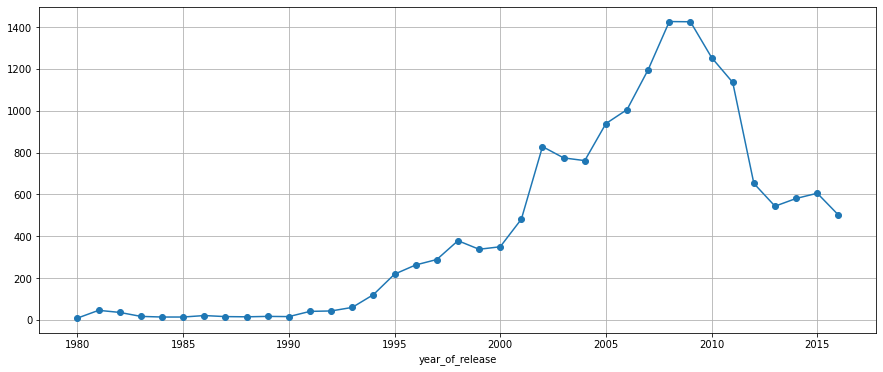

In [ ]:
data.groupby('year_of_release')['name'].count().plot(grid=True, style='o-', figsize=(15, 6))

*Рост количества выпускаемых игр произошел в начале 90-х годов, темпы с каждым годом увеичивались и в 2008-2009 достигли своего пика - свыше 1400 игр в год. После случился спад и в последние пару лет выпускается 500-600 игр в год.*

### Распределение продаж по платформам. Продажи популярных платформ в разные годы.

<AxesSubplot:xlabel='platform'>

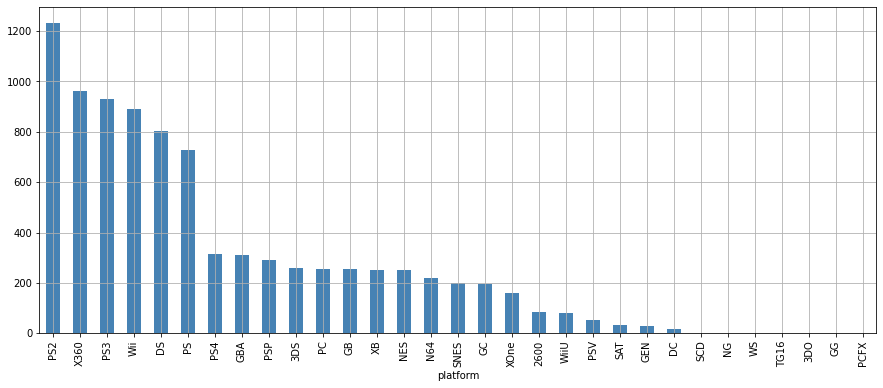

In [ ]:
data.groupby('platform')['world_sales'].sum().sort_values(ascending=False).plot(grid=True, kind='bar', figsize=(15,6), color='steelblue')

In [ ]:
def platforms(platform, index):
    bar = data[data['platform'] == platform].pivot_table(
        index='year_of_release', values='world_sales', aggfunc='sum'
    ).plot(grid=True, kind='bar', title=platform, ax=axes[index], fontsize=10, width=0.5, color='teal')
    bar.title.set_size(12)
    bar.set_xlabel('')

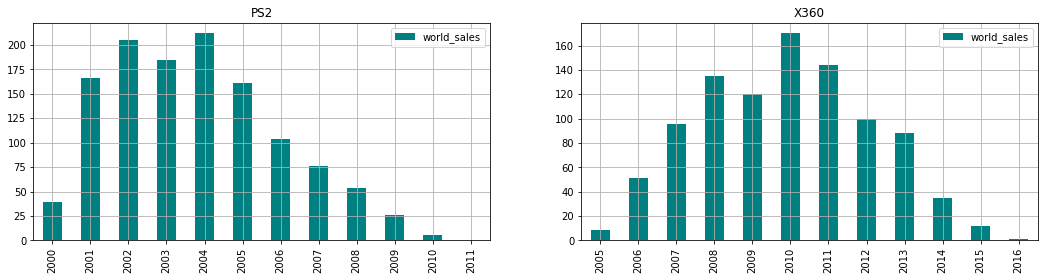

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
platforms('PS2', 0)
platforms('X360', 1)

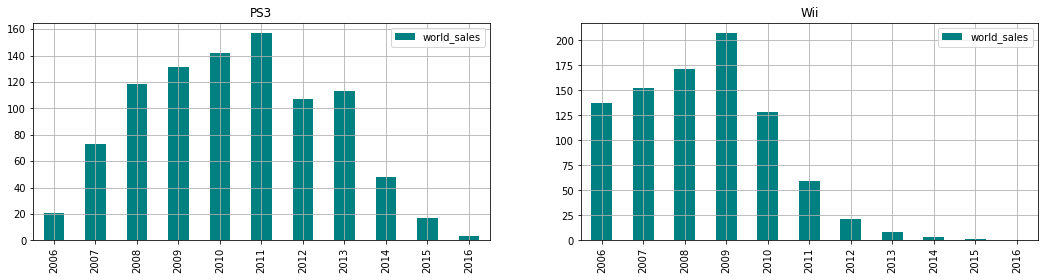

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
platforms('PS3', 0)
platforms('Wii', 1)

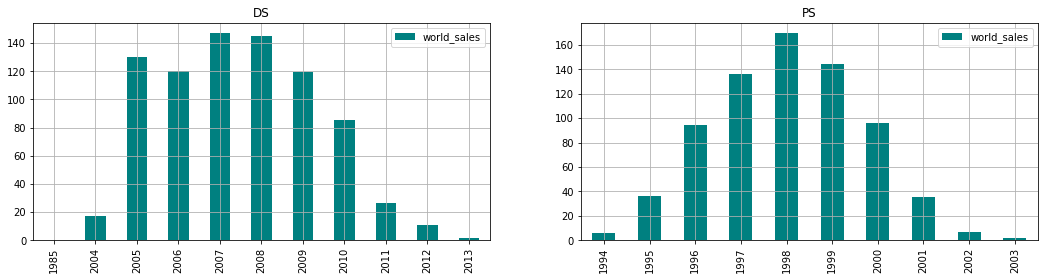

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
platforms('DS', 0)
platforms('PS', 1)

<AxesSubplot:xlabel='year_of_release', ylabel='world_sales'>

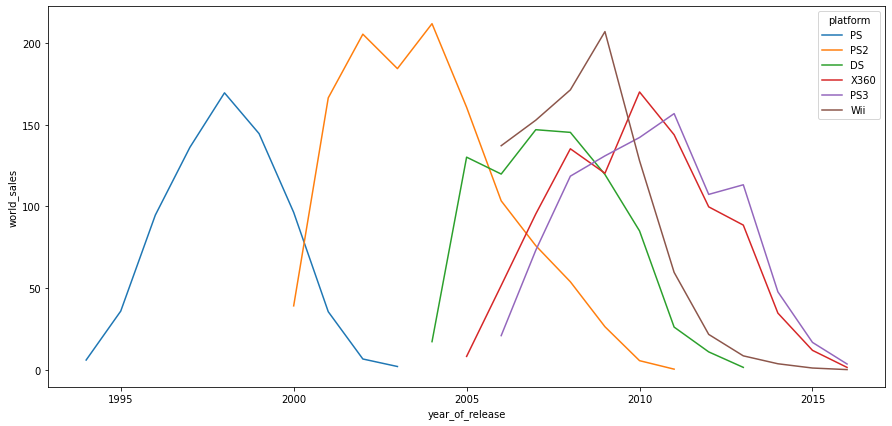

In [ ]:
plt.figure(figsize=(15, 7))

pl = ['PS2','X360', 'PS3', 'Wii', 'DS', 'PS']
bar = data.query(
    'platform in @pl & year_of_release > 1990').pivot_table(
    index=['year_of_release', 'platform'], values='world_sales', aggfunc='sum')
sns.lineplot(x='year_of_release', y='world_sales', hue='platform',
             markers=True, dashes=False, data=bar)

*Наиболее продаваемые платформы за все время - PS2, Xbox-360, PS3, Wii, DS, PS.
Прослеживается закономерность - срок их жизни составляет примерно 10 лет. Вероятно, после выхода нового поколения консолей слишком старые платформы не поддерживают акуальные игры. Пиковые продажи приходятся примерно на 4-6 годы после выпуска платформы.*

### Продажи по платформам за актуальный период.

In [ ]:
df = data.query('year_of_release > 2011')

<AxesSubplot:xlabel='year_of_release', ylabel='world_sales'>

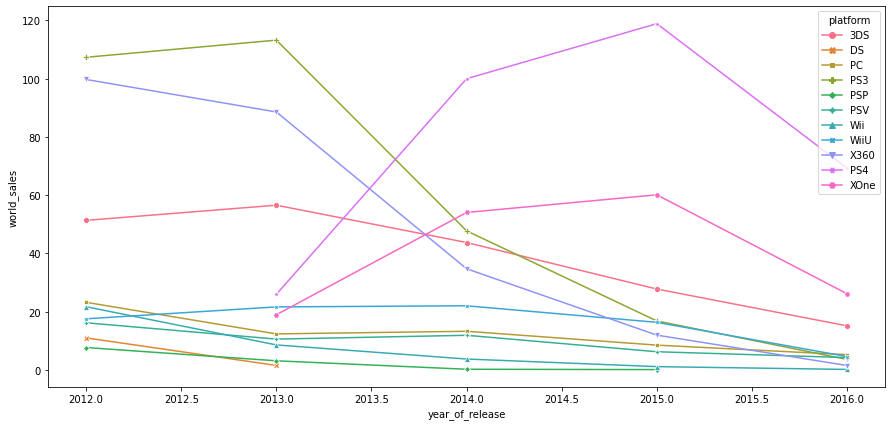

In [ ]:
plt.figure(figsize=(15, 7))

gr = df.pivot_table(index=['year_of_release', 'platform'], values='world_sales', aggfunc='sum')
sns.lineplot(
    x='year_of_release',
    y='world_sales', hue='platform', style='platform',
    markers=True, dashes=False, data=gr
)

*За актуальный период возьмем данные начиная с 2012 года. Данных за 5 лет достаточно для прогноза на 2017. В предыдущие годы объемы продаж сильно превышали актуальные значения, но большинство из платформ тех лет не актуальны.*

*Спад характерен для всего рынка в целом. Наиболее продаваемые платформы - PS4, XboxOne, 3DS, они же и потенциально самые прибыльные на 2017 год.*

### 'Ящик с усами' по глобальным продажам игр в разбивке по платформам.

In [ ]:
df['world_sales'].describe()

count    2886.000000
mean        0.501223
std         1.249157
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: world_sales, dtype: float64

<AxesSubplot:xlabel='platform', ylabel='world_sales'>

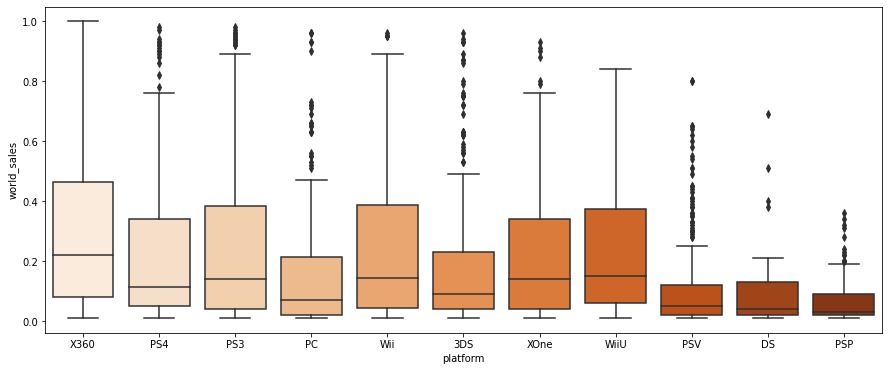

In [ ]:
plt.figure(figsize=(15,6))

sns.boxplot(
    data=df.query('world_sales < 1'),
    x='platform', y='world_sales', palette='Oranges'
)

- *Наибольшее медианное значение у xbox360.*
- *В данных каждой платформы встречаются выбросы*
- *Визуально платформы можно поделить на 3 типа по близости данных между 1 и 3 квартилем:*
 1. Наименьшая стоимость - PSV, DS, PSP
 2. Средня стоимость - PC, 3DS
 3. Лидеры по ценам - X360, PS4, PS3, WII, XOne, WiiU

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?

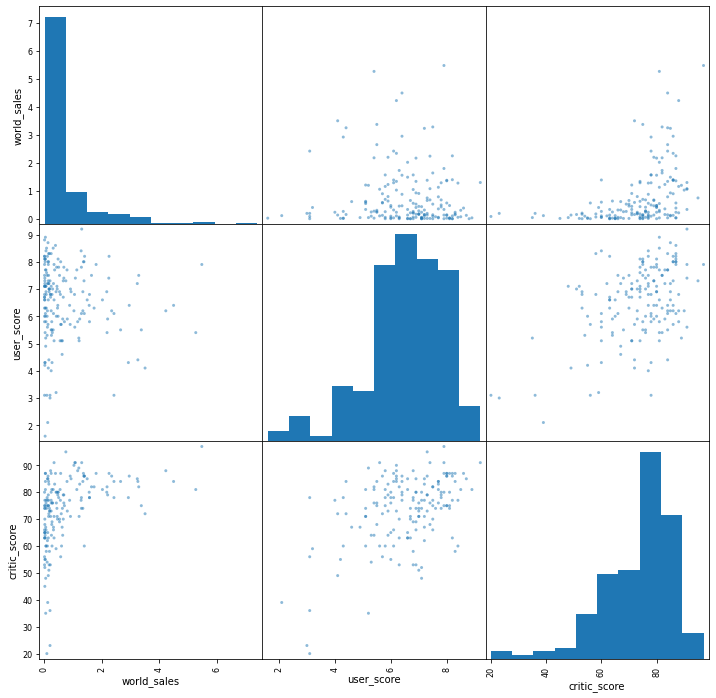

In [ ]:
pd.plotting.scatter_matrix(df[df['platform'] == 'XOne'][['world_sales', 'user_score', 'critic_score']], figsize=(12, 12));

In [ ]:
df[df['platform'] == 'XOne'][['world_sales', 'user_score', 'critic_score']].corr()

,world_sales,user_score,critic_score
world_sales,1.000000,-0.068925,0.416998
user_score,-0.068925,1.000000,0.472462
critic_score,0.416998,0.472462,1.000000


*Рассчитанный коэффициент корреляции демонстрирует среднюю зависимость между оценками критиков и глобальными продажами. Оценки пользователей вовсе не оказывают влияния на продажи.*

*Судя по диаграмме рассеивания можно сделать выводы:*
1. *Большинство игр имеют маленькие продажи независимо от оценок.*
2. *Если откинуть эти игры, есть закономерность, что чем выше оценка, тем больше прожажи. Это относится к оценкам критиков в большей степени и пользователей чуть в меньшей.*

### Влияние на продажи игр на других платфомах.

In [ ]:
def matrix(platform):
    pl_corr = df[df['platform'] == platform][['world_sales', 'user_score', 'critic_score']]
    return pl_corr.corr()

In [ ]:
display(matrix('X360'), 'Матрица корреляции для X360',
        matrix('PS4'), 'Матрица корреляции для PS4',
        matrix('3DS'), 'Матрица корреляции для 3DS',
        matrix('PC'), 'Матрица корреляции для PC',
        matrix('WiiU'), 'Матрица корреляции для WiiU'
       )

,world_sales,user_score,critic_score
world_sales,1.000000,0.006164,0.360573
user_score,0.006164,1.000000,0.557352
critic_score,0.360573,0.557352,1.000000


'Матрица корреляции для X360'

,world_sales,user_score,critic_score
world_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


'Матрица корреляции для PS4'

,world_sales,user_score,critic_score
world_sales,1.000000,0.197583,0.320803
user_score,0.197583,1.000000,0.722762
critic_score,0.320803,0.722762,1.000000


'Матрица корреляции для 3DS'

,world_sales,user_score,critic_score
world_sales,1.000000,-0.121867,0.237243
user_score,-0.121867,1.000000,0.432587
critic_score,0.237243,0.432587,1.000000


'Матрица корреляции для PC'

,world_sales,user_score,critic_score
world_sales,1.000000,0.400219,0.34838
user_score,0.400219,1.000000,0.77008
critic_score,0.348380,0.770080,1.00000


'Матрица корреляции для WiiU'

<AxesSubplot:title={'center':'X360'}, xlabel='user_score', ylabel='world_sales'>

<AxesSubplot:title={'center':'X360'}, xlabel='critic_score', ylabel='world_sales'>

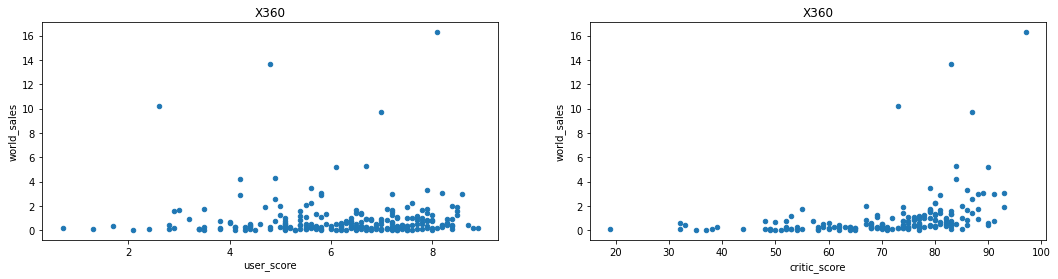

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
display(df[df['platform'] == 'X360'].plot(x='user_score', y='world_sales', kind='scatter', ax=axes[0], title='X360'),
df[df['platform'] == 'X360'].plot(x='critic_score', y='world_sales', kind='scatter', ax=axes[1], title='X360')
)

<AxesSubplot:title={'center':'PS4'}, xlabel='user_score', ylabel='world_sales'>

<AxesSubplot:title={'center':'PS4'}, xlabel='critic_score', ylabel='world_sales'>

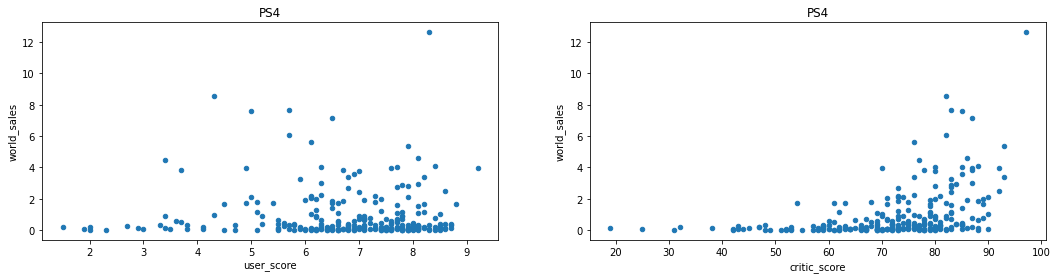

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
display(df[df['platform'] == 'PS4'].plot(x='user_score', y='world_sales', kind='scatter', ax=axes[0], title='PS4'),
df[df['platform'] == 'PS4'].plot(x='critic_score', y='world_sales', kind='scatter', ax=axes[1], title='PS4')
)

<AxesSubplot:title={'center':'3DS'}, xlabel='user_score', ylabel='world_sales'>

<AxesSubplot:title={'center':'3DS'}, xlabel='critic_score', ylabel='world_sales'>

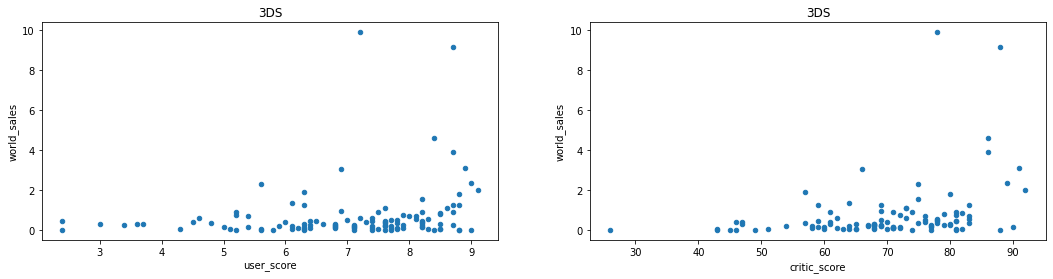

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
display(df[df['platform'] == '3DS'].plot(x='user_score', y='world_sales', kind='scatter', ax=axes[0], title='3DS'),
df[df['platform'] == '3DS'].plot(x='critic_score', y='world_sales', kind='scatter', ax=axes[1], title='3DS')
)

<AxesSubplot:title={'center':'PC'}, xlabel='user_score', ylabel='world_sales'>

<AxesSubplot:title={'center':'PC'}, xlabel='critic_score', ylabel='world_sales'>

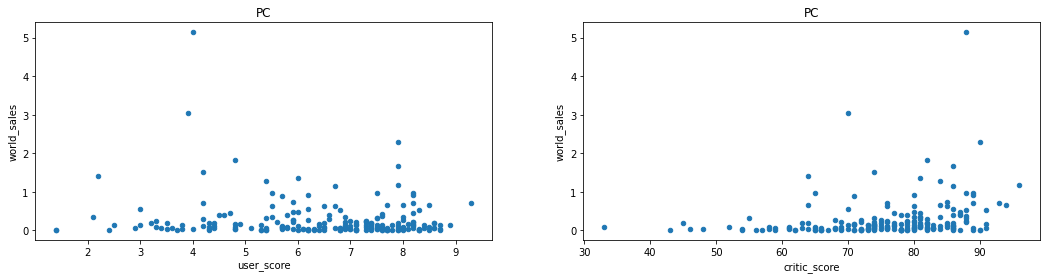

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
display(df[df['platform'] == 'PC'].plot(x='user_score', y='world_sales', kind='scatter', ax=axes[0], title='PC'),
df[df['platform'] == 'PC'].plot(x='critic_score', y='world_sales', kind='scatter', ax=axes[1], title='PC')
)

<AxesSubplot:title={'center':'WiiU'}, xlabel='user_score', ylabel='world_sales'>

<AxesSubplot:title={'center':'WiiU'}, xlabel='critic_score', ylabel='world_sales'>

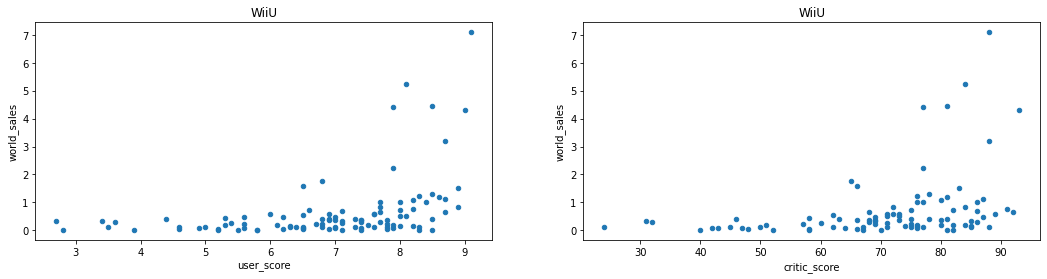

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
display(df[df['platform'] == 'WiiU'].plot(x='user_score', y='world_sales', kind='scatter', ax=axes[0], title='WiiU'),
df[df['platform'] == 'WiiU'].plot(x='critic_score', y='world_sales', kind='scatter', ax=axes[1], title='WiiU')
)

*В целом - тенденця сохраняется: оценки критиков оказывают среднее влияние на глобальные продажи, оценки пользователей - минимальное. Исключение WiiU, для этой платформы коэф.корреляции демонстрирует, что оценки пользователей имеют даже большее влияние, чем оценки критиков.*

*Для диаграммы рассеивания также - влияние критиков прослеживается в большей степени. PS4 самая зависимая от критиков платформа. WiiU самая зависимая от оценок пользователей платформа. Продажи большинства игр на платформах имеют минимальные продажи независимо от оценок.*

### Распределение игр по жанрам и прибыльность жанров.

<AxesSubplot:title={'center':'Распределение игр по жанрам'}, xlabel='genre'>

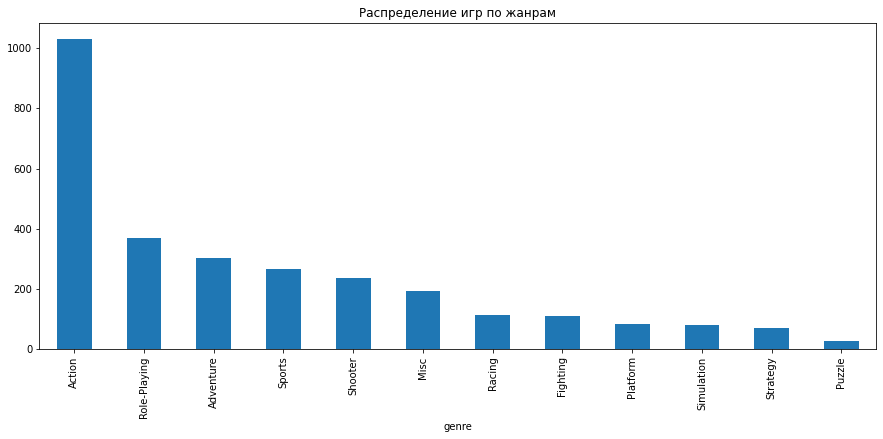

In [ ]:
df.groupby('genre')['genre'].count().sort_values(ascending=False).plot(
    kind='bar', figsize=(15,6), title='Распределение игр по жанрам')

<AxesSubplot:title={'center':'Распределение по прибыльности жанров'}, xlabel='genre', ylabel='world_sales'>

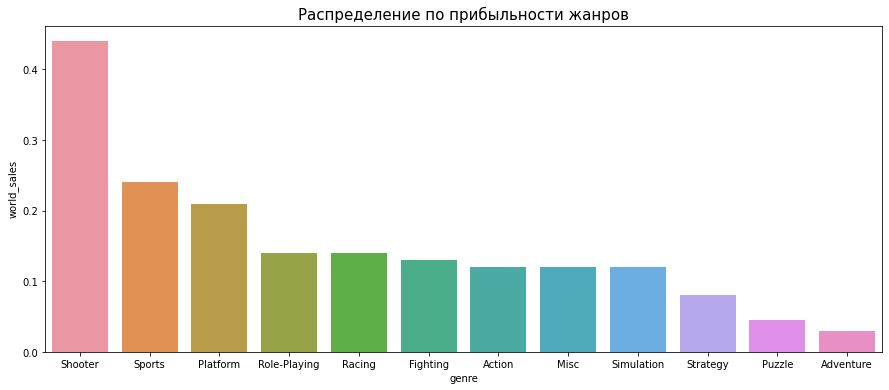

In [ ]:
d = df.pivot_table(index='genre', values='world_sales', aggfunc='median').sort_values('world_sales', ascending=False).reset_index()

plt.figure(figsize=(15, 6))
plt.title('Распределение по прибыльности жанров', fontsize= 15)
sns.barplot(data=d, x='genre', y='world_sales')

1. *Экшен с отрывом лидирует в списке по количеству игр по жанрам. Затем идут рпг, адвенчур и спорт. Замыкают - стратегии и пазлы.*

2. *Самый доходный жанр - шутер. Почти в два раза меньше приносят спортивные симуляторы и платформеры. Наименее доходные жанры - пазлы и адвенчуры.*

## Портрет пользователя по регионам

### Самые популярные платформы каждого региона.

In [ ]:
def region_sales(feature, region, name, color, index):
    gr = df.pivot_table(index=feature, values=region, aggfunc='sum').sort_values(region, ascending=False).head()
    plot = gr.plot(kind='bar', title=name, ax=axes[index], color=color, fontsize=20, ec='teal')
    plot.title.set_size(20)
    plot.set_xlabel('')

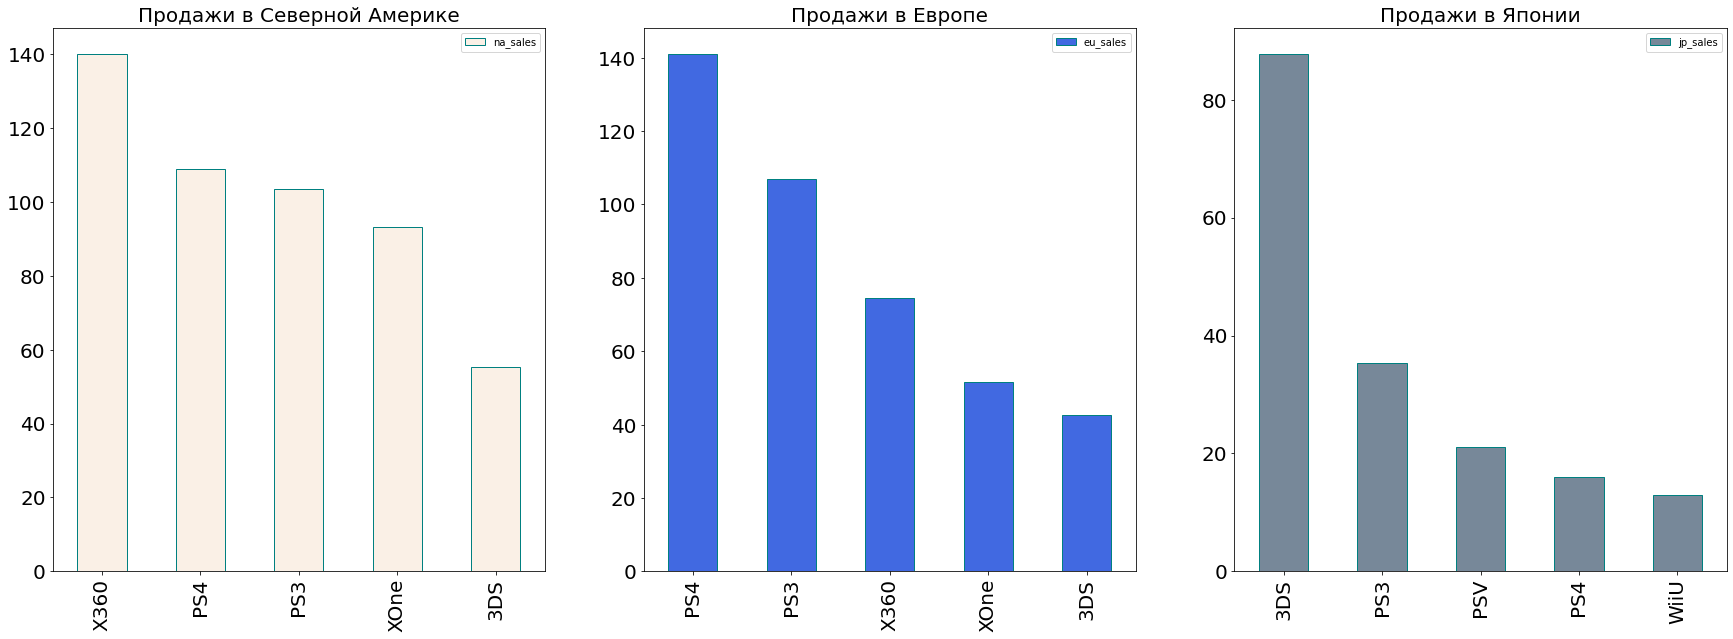

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

region_sales('platform', 'na_sales', 'Продажи в Северной Америке', 'linen', 0)
region_sales('platform', 'eu_sales', 'Продажи в Европе', 'royalblue', 1)
region_sales('platform', 'jp_sales', 'Продажи в Японии', 'lightslategray', 2)

1. *В Северной Америке хорошо продаются новые консоли - XOne и PS4, лидирует X360, PS3 немного отстает.*
2. *В Европе лидируют play station, новая версия продается лучше всех. Xbox в Европе ценится немного меньше.*
3. *В Японии едноличный лидер - 3DS. Затем PS3 - более чем в 2 раза меньше продаж. Рынок Японии отличается от Европы и Америки.*

###  Самые популярные жанры каждого региона.

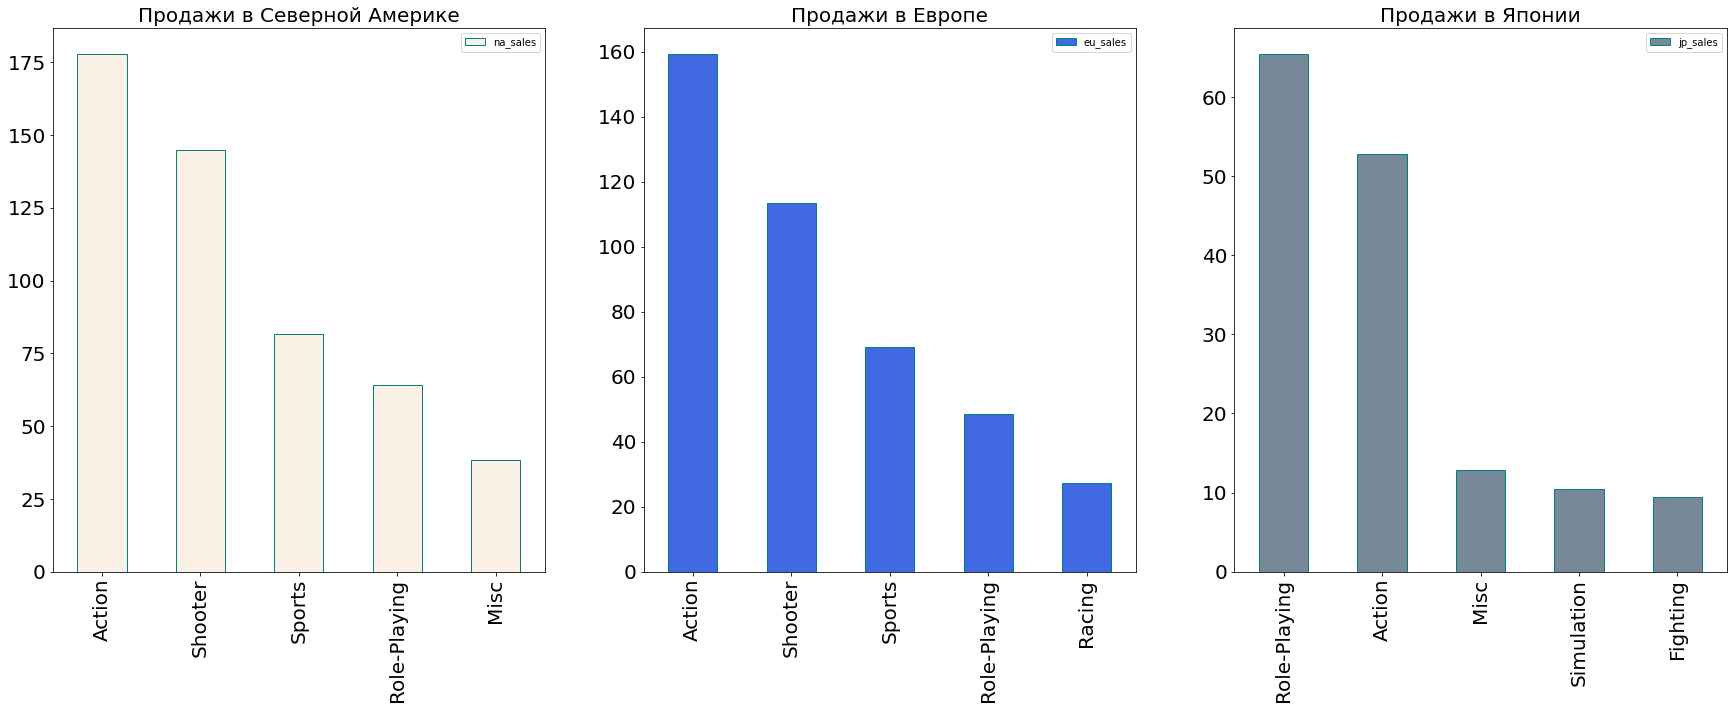

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

region_sales('genre', 'na_sales', 'Продажи в Северной Америке', 'linen', 0)
region_sales('genre', 'eu_sales', 'Продажи в Европе', 'royalblue', 1)
region_sales('genre', 'jp_sales', 'Продажи в Японии', 'lightslategray', 2)

1. *Экшен любят во всех регионах.*
2. *Рынки Северной Америки и Европы практически идентичны. Тут еще любят шутеры, спорт и rpg.*
3. *Япония уникальный регион, тут два доминирующих жанра - рпг и экшен.*

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

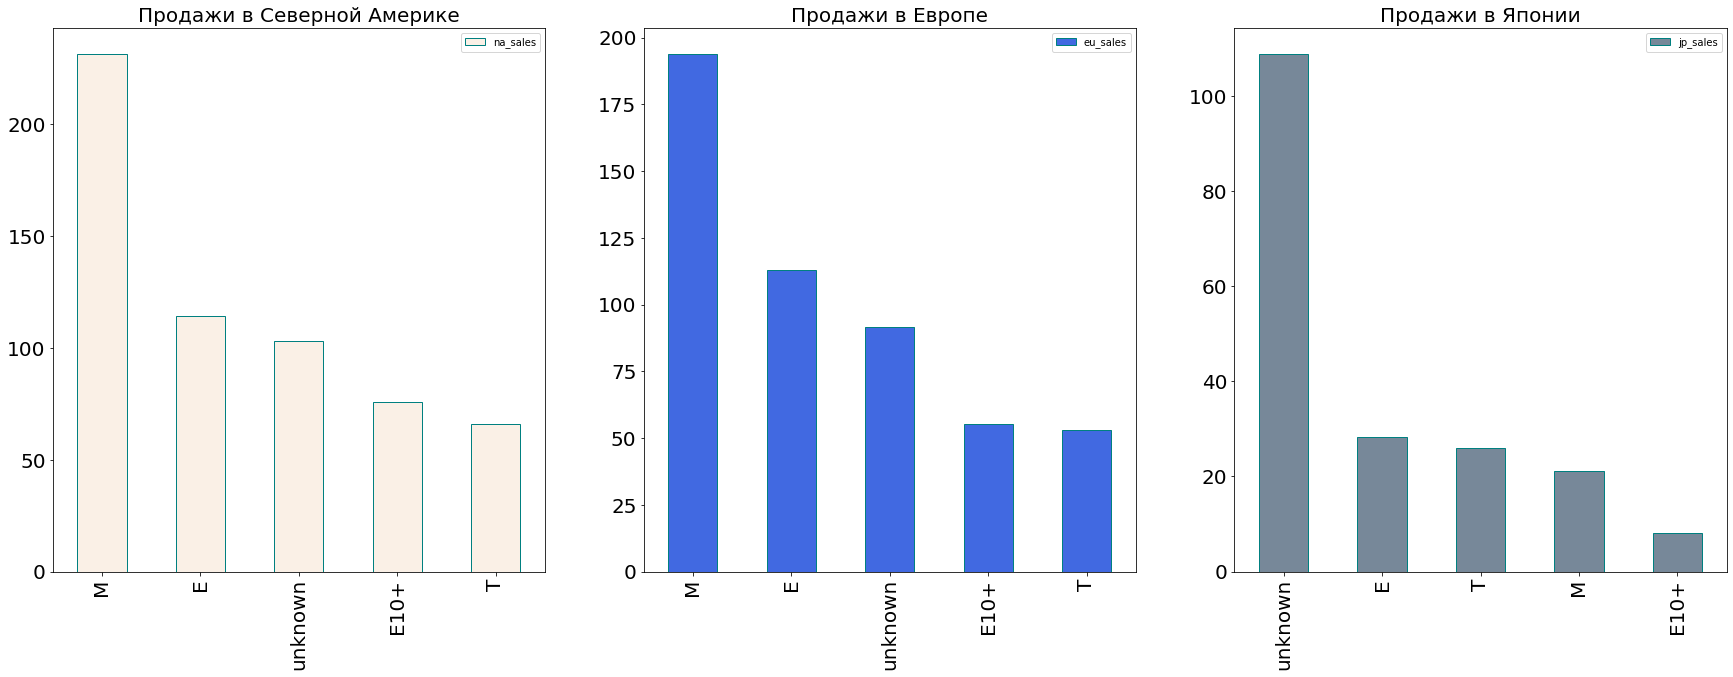

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

region_sales('rating', 'na_sales', 'Продажи в Северной Америке', 'linen', 0)
region_sales('rating', 'eu_sales', 'Продажи в Европе', 'royalblue', 1)
region_sales('rating', 'jp_sales', 'Продажи в Японии', 'lightslategray', 2)

1. *В Европе и Америке ситуация одинаковая: лидирует рейтинг "M" - для взрослых, затем "E" - для всех, много игр без рейтинга, замыкают игры для подростков и детей от 10 лет.*
2. *В Японии, вероятно, этот рейтинг редко используется. Лидируют игры без рейтинга. Игры для всех, для взрослых и подростков продаются примерно одинаково.*

## Проверка гипотез

Для проверки этих гипотез используем метод scipy.stats.ttest_ind. У нас нет основания считать, что дисперсии выборок равные, поэтому задействуем параметр equal_var=False.

Нулевая гипотеза всегда должна гласить о равенстве выборок. P-value сравнивается с критическим уровнем статистической значимости. И если p-value меньше, нулевая гипотеза отвергается в пользу альтернативной.

Проверка гипотезы:

```
H_0: Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.
H_a: Cредние пользовательские рейтинги платформ Xbox One и PC отличаются.
```

In [ ]:
results = st.ttest_ind(
    df[df['platform'] == 'XOne']['user_score'].dropna(),
    df[df['platform'] == 'PC']['user_score'].dropna(),
    equal_var=False
)

alpha = 0.05
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Проверка гипотезы:

```
H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
H_a: Средние пользовательские рейтинги жанров Action и Sports разные.
```

In [ ]:
results = st.ttest_ind(
    df[df['genre'] == 'Action']['user_score'].dropna(),
    df[df['genre'] == 'Sports']['user_score'].dropna(),
    equal_var=False
)

alpha = 0.05
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 4.24307776572644e-20
Отвергаем нулевую гипотезу


**Вывод:**
1. *Гипотеза средние пользовательские рейтинги платформ Xbox One и PC одинаковые отвергнуть не удалось.*
2. *Есть основание полагать, что нулевая гипотеза неверна, значит гипотеза средние пользовательские рейтинги жанров Action и Sports разные, вероятно, подтвердилась.*

## Общий вывод

*В исследовании мы проверили несколько гипотез и установили:*

1. *Исследовательский анализ данных.*

В 2008-2009 продажи игр достигли своего пика - свыше 1400 игр в год. С 2012-2016 выпускается 500-600 игр в год.

Наиболее продаваемые платформы за все время - PS2, Xbox-360, PS3, Wii, DS, PS. Срок их жизни в среднем составляет 10 лет. Пиковые продажи приходятся примерно на 5й год платформы.

Спад продаж в последние годы характерен для всего рынка в целом. PS4, XboxOne, 3DS потенциально самые прибыльные на 2017 год.

Лидеры по ценам игр среди платформ X360, PS4, PS3, WII, XOne, WiiU. Игры на PSV, DS, PSP, PC, 3DS стоят дешевле.

Рассчитанный коэффициент корреляции демонстрирует среднюю зависимость между оценками критиков и глобальными продажами. Оценки пользователей оказывают минимальное влияние на продажи.

Шутер лидирует по прибыльности жанров. Пазлы и адвенчуры наименее прибыльные жанры.

2. *Портрет пользователя по региронам.*

В Северной Америке и Европе одинаковые предпочтения по платформам - PS и Xbox. В Америке лидирирует X360, В Европе PS4. В Японии рынок отличается, доминирует 3DS.

Рынки Северной Америки и Европы практически идентичны. Предпочитают экшен, шутеры, спорт и rpg. В Японии покупают рпг и экшен.

В Европе и Америке ситуация одинаковая: лидирует рейтинг "M" , затем "E", "unknown". В Японии c огромным отрывом лидируют игры без рейтинга.


3. *Проверка гипотез.*

Гипотезу средние пользовательские рейтинги платформ Xbox One и PC одинаковые отвергнуть не удалось.

Гипотеза средние пользовательские рейтинги жанров Action и Sports разные подтвердилась.